# Assignment 2:
    Test the difference between a Binomial/Poisson distribution and a Gaussian distribution as you change the parameters of the Binomial/Poisson. Use: 
    
    1) KS
    
    2) KL or Chisq
    
    3) AD
    
    6 test total (8 if you are ambitious and want to try Pearson's chisq)
    
    I want you to use the scipy.stats package for this. it will provide tests. For KS and AD you will simply need to generate the distribution the normal will be tested agains: the KS and AD functions in scipy have functionality to test against standard distributions (normal, chisq etc) without you having to code up anything about the distribution itself. KL and chisq do not. I am showing you how to do the AD, KS and KL for binomial, you can replicate it for the poisson or do the Chisq instead of KL.
    
    even if you just replicate it... PLEASE UNDESRTAND IT! or you will have learned nothing and wasted both of our times

In [3]:
import pylab as pl
import pandas as pd
import numpy as np
import os
import scipy.stats
import math
%pylab inline
np.random.seed(26) # because that's my age :)

Populating the interactive namespace from numpy and matplotlib



The hypothesis test for the KS-test is the following: 

$H_0$ =	The data follow a specified distribution.

$H_1$ = The data do not follow the specified distribution

Same for Anderson test.

In our case, for example for poisson on normal:

$H_0$ = Data from Poisson distribution follows a Normal distribution

$H_0$ = Data from Poisson distribution does ***not*** follows a Normal distribution

Specifically:

***Kolmogorov–Smirnov test***: Quantifies the distance between the empricial distribution of the sample with the reference distribution by comparing the CDFs of both distributions.

***Anderson-Darling test***: Does basically the same as the KS test, but applies more weight to the tails of the distributions.

###KS and Anderson Test

In [5]:
def mynorm (x,mu,var):
    return scipy.stats.norm.cdf(x, loc=mu, scale=var) # var should be std dev

In [6]:
dist_n = np.random.normal(0,1,1000)

print 'Normal'
print "normal on normal: kstest", scipy.stats.kstest(dist_n,'norm')
print "normal on normal: anderson", scipy.stats.anderson(dist_n, dist='norm') 
print
print

dist_p = np.random.poisson(lam=1.0, size=1000)

print 'Poisson'
print "poisson on normal: kstest", scipy.stats.kstest(dist_p, mynorm, args=(1.0, 1.0)) # since lamda = 1.0
print 'poisson on normal: anderson', scipy.stats.anderson(dist_p, dist='norm')
print 
print

dist_p = np.random.poisson(lam=40.0, size=1000) # What if we increase lamda? => Distributions becomes similar to normal

print 'Poisson with lamda = 40'
print "poisson on normal: kstest", scipy.stats.kstest(dist_p, mynorm, args=(1.0, 1.0)) # since lamda = 1.0
print 'poisson on normal: anderson', scipy.stats.anderson(dist_p, dist='norm')

Normal
normal on normal: kstest KstestResult(statistic=0.025450455423220775, pvalue=0.53633009980937307)
normal on normal: anderson AndersonResult(statistic=0.30058276743193346, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


Poisson
poisson on normal: kstest KstestResult(statistic=0.251, pvalue=0.0)
poisson on normal: anderson AndersonResult(statistic=62.737840901247864, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


Poisson with lamda = 40
poisson on normal: kstest KstestResult(statistic=1.0, pvalue=0.0)
poisson on normal: anderson AndersonResult(statistic=1.2795880088131071, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


In [7]:
n = 50
p = 0.5
dist_b = np.random.binomial(n,p,1000)

print 'Binomial'
print 'binomial on normal: kstest', scipy.stats.kstest(dist_b, mynorm, args=(n*p,n*p*(1.0-p)))
print 'binomial on normal: anderson', scipy.stats.anderson(dist_b, dist='norm')

Binomial
binomial on normal: kstest KstestResult(statistic=0.29257825838967583, pvalue=0.0)
binomial on normal: anderson AndersonResult(statistic=3.4262112660989033, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


In [8]:
threshold = scipy.stats.anderson(dist_n, dist='norm')[1][scipy.stats.anderson(dist_n, dist='norm')[2]==[1.0]]
print 'Threshold:',threshold #what is this threshold I am saving??
print "Critical value for alpha = 5%"

Threshold: [ 1.088]
Critical value for alpha = 5%


###Conclusion:
The p-value means we fail to reject the null hypothesis comparing a normally distributed sample to a normal distribution.

For the Poisson and Binomial distributions, we reject the null hypothesis. 


### Kullback–Leibler divergence

Measures the difference between two probability distributions, or how much information is lost when a specific sample is approximated by a certain distribution.

In [9]:
dist_p = np.random.poisson(lam=1.0, size=1000)
distpdf_n, mybins_n, = np.histogram(dist_n, density=True)
distpdf_p, mybins_p, = np.histogram(dist_p, density=True)

In [10]:
bincenters_n = mybins_n[:-1] + 0.5*(mybins_n[1] - mybins_n[0])
bincenters_p = mybins_p[:-1] + 0.5*(mybins_p[1] - mybins_p[0])
print "normal on normal", scipy.stats.entropy(distpdf_n, scipy.stats.norm.pdf(bincenters_n))  
print "poisson on normal", scipy.stats.entropy(distpdf_p, scipy.stats.norm.pdf(bincenters_p)) 

normal on normal 0.00151299468351
poisson on normal 0.885809721103


In [11]:
# For binomial
distpdf_b, mybins_b, = np.histogram(dist_b, density=True)
bincenters_b = mybins_b[:-1] + 0.5*(mybins_b[1] - mybins_b[0])
print "binomial on normal", scipy.stats.entropy(distpdf_b, scipy.stats.norm.pdf(bincenters_b)) 

binomial on normal 222.322145159


####Pearson's Chi Squared Test

H0: the frequency distribution of an observed sample is consistent with the chosen theoretical distribution

H1: the frequency distribution of an observed sample is not consistent (or inconsistent) with the chosen theoretical distribution
    

In [12]:
chi2_n = scipy.stats.chisquare(distpdf_n, scipy.stats.norm.pdf(bincenters_n)) 
print "normal on normal: test score =",chi2_n[0], 'p-value =',chi2_n[1]
chi2_p = scipy.stats.chisquare(distpdf_p,scipy.stats.norm.pdf(bincenters_p))
print "poisson on normal: test score =",chi2_p[0], 'p-value =',chi2_p[1]
chi2_b = scipy.stats.chisquare(distpdf_b,scipy.stats.norm.pdf(bincenters_b))
print "binomial on normal: test score =",chi2_b[0], 'p-value =',chi2_b[1]

normal on normal: test score = 0.0045457572724 p-value = 1.0
poisson on normal: test score = 37.8235799267 p-value = 1.87484927999e-05
binomial on normal: test score = 3.58328554738e+245 p-value = 0.0


###Conclusion:

For normal on normal, we fail to reject the null hypothesis. However, for the Poisson and Binomial, we would reject the null.

##Binomial

I can't get this one to work for some reason

In [16]:
# Chi square does not work when iterating:
narray = range(1,50,1)
ks_b = np.zeros(len(narray))
ad_b = np.zeros(len(narray))
kl_b = np.zeros(len(narray))
chi2_b = np.zeros(len(narray))

p=0.1
for i,n in enumerate(narray):
    dist = np.random.binomial(n, p, 1000)
    ks_b[i] = scipy.stats.kstest(dist, mynorm, args=(n*p, n*p*(1.0-p)))[0]
    ad_b[i] = scipy.stats.anderson(dist, dist='norm')[0]
  
    distpdf_b, mybins_b, = np.histogram(dist_b, density=True)
    bincenters_b = mybins_b[:-1] + 0.5*(mybins_b[1] - mybins_b[0])

    chi2_b[i] = scipy.stats.chisquare(distpdf_b,scipy.stats.norm.pdf(bincenters_b))
    kl_b[i] =  scipy.stats.entropy(distpdf_b, scipy.stats.norm.pdf(bincenters_b)) 

ValueError: setting an array element with a sequence.

In [15]:
# Chi square does not work when iterating:
narray = range(1,50,1)
ks_b = np.zeros(len(narray))
ad_b = np.zeros(len(narray))
kl_b = np.zeros(len(narray))
chi2_b = np.zeros(len(narray))

p=0.1
for i,n in enumerate(narray):
    dist = np.random.binomial(n, p, 1000)
    ks_b[i] = scipy.stats.kstest(dist, mynorm, args=(n*p, n*p*(1.0-p)))[0]
    ad_b[i] = scipy.stats.anderson(dist, dist='norm')[0]
  
    distpdf_b, mybins_b, = np.histogram(dist_b, density=True)
    bincenters_b = mybins_b[:-1] + 0.5*(mybins_b[1] - mybins_b[0])

    chi2_b[i] = scipy.stats.chisquare(distpdf_b,scipy.stats.norm.pdf(bincenters_b))
    kl_b[i] =  scipy.stats.entropy(distpdf_b, scipy.stats.norm.pdf(bincenters_b)) 

ValueError: setting an array element with a sequence.

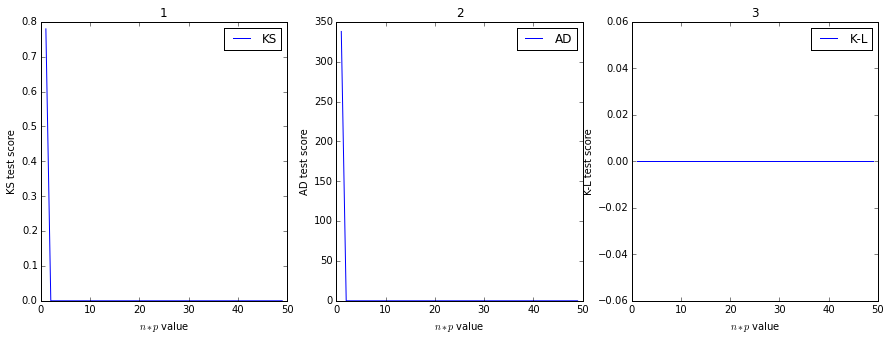

In [20]:
fig = pl.figure(figsize = (15,5))
fig.add_subplot(131)
pl.plot(narray, ks_b, label='KS')
pl.xlabel('$n*p$ value')
pl.ylabel('KS test score')
pl.title('1')
pl.legend()

fig.add_subplot(132)
pl.plot(narray, ad_b,  label='AD')
pl.xlabel('$n*p$ value')
pl.ylabel('AD test score')
pl.title('2')
pl.legend()

fig.add_subplot(133)
pl.plot(narray, kl_b, label='K-L ')
pl.xlabel('$n*p$ value')
pl.ylabel('K-L test score')
pl.title('3')
pl.legend()

##Poisson

In [17]:
# Chi square does not work when iterating:
narray = range(1,50,1)
ks_p = np.zeros(len(narray))
ad_p = np.zeros(len(narray))
kl_p = np.zeros(len(narray))
chi2_p = np.zeros(len(narray))

for i,n in enumerate(narray):
    dist = np.random.poisson(n, 1000)
    ks_p[i] = scipy.stats.kstest(dist, mynorm, args=(n, n))[0]
    ad_p[i] = scipy.stats.anderson(dist, dist='norm')[0]
    
    distpdf_b, mybins_b, = np.histogram(dist_b, density=True)
    bincenters_b = mybins_b[:-1] + 0.5*(mybins_b[1] - mybins_b[0])
 
    kl_p [i] =  scipy.stats.entropy(distpdf_b, scipy.stats.norm.pdf(bincenters_b, loc=n, scale=n))
    chi2_b[i] = scipy.stats.chisquare(distpdf_b,scipy.stats.norm.pdf(bincenters_b, loc=n, scale=n))

ValueError: setting an array element with a sequence.

In [18]:
narray = range(1,50,1)
ks_p = np.zeros(len(narray))
ad_p = np.zeros(len(narray))
kl_p = np.zeros(len(narray))

for i,n in enumerate(narray):
    dist = np.random.poisson(n, 1000)
    ks_p[i] = scipy.stats.kstest(dist, mynorm, args=(n, n))[0]
    ad_p[i] = scipy.stats.anderson(dist, dist='norm')[0]
    
    mybins = np.linspace(min(dist),max(dist), 10) 
    bincenters = mybins[:-1]+0.5*(mybins[1]-mybins[0])
 
    kl_p [i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0], scipy.stats.norm.pdf(bincenters, loc=n, scale=n))  

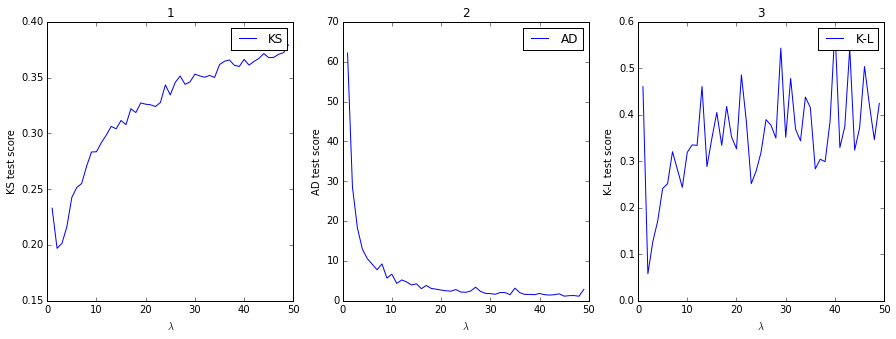

In [19]:
fig = pl.figure(figsize = (15,5))
fig.add_subplot(131)
pl.plot(narray, ks_p, label='KS')
pl.xlabel('$\lambda$')
pl.ylabel('KS test score')
pl.title('1')
pl.legend()

fig.add_subplot(132)
pl.plot(narray, ad_p,  label='AD')
pl.xlabel('$\lambda$')
pl.ylabel('AD test score')
pl.title('2')
pl.legend()

fig.add_subplot(133)
pl.plot(narray, kl_p, label='K-L ')
pl.xlabel('$\lambda$')
pl.ylabel('K-L test score')
pl.title('3')
pl.legend()